# Dynamical X-ray Scattering

In this example static and transient X-ray simulations are carried out employing the dynamical X-ray scattering formalism.

## Setup

Do all necessary imports and settings.

In [1]:
import udkm1Dsim as ud
u = ud.u  # import the pint unit registry from udkm1Dsim
import scipy.constants as constants
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
u.setup_matplotlib()  # use matplotlib with pint units

## Structure

Refer to the [structure-example](structure.ipynb) for more details.

In [2]:
O = ud.Atom('O')
Ti = ud.Atom('Ti')
Sr = ud.Atom('Sr')
Ru = ud.Atom('Ru')
Pb = ud.Atom('Pb')
Zr = ud.Atom('Zr')

In [3]:
# c-axis lattice constants of the two layers
c_STO_sub = 3.905*u.angstrom
c_SRO = 3.94897*u.angstrom
# sound velocities [nm/ps] of the two layers
sv_SRO = 6.312*u.nm/u.ps
sv_STO = 7.800*u.nm/u.ps

# SRO layer
prop_SRO = {}
prop_SRO['a_axis'] = c_STO_sub  # aAxis
prop_SRO['b_axis'] = c_STO_sub  # bAxis
prop_SRO['deb_Wal_Fac'] = 0  # Debye-Waller factor
prop_SRO['sound_vel'] = sv_SRO  # sound velocity
prop_SRO['opt_ref_index'] = 2.44+4.32j
prop_SRO['therm_cond'] = 5.72*u.W/(u.m *u.K)  # heat conductivity
prop_SRO['lin_therm_exp'] = 1.03e-5  # linear thermal expansion
prop_SRO['heat_capacity'] = '455.2 + 0.112*T - 2.1935e6/T**2'  # heat capacity [J/kg K]

SRO = ud.UnitCell('SRO', 'Strontium Ruthenate', c_SRO, **prop_SRO)
SRO.add_atom(O, 0)
SRO.add_atom(Sr, 0)
SRO.add_atom(O, 0.5)
SRO.add_atom(O, 0.5)
SRO.add_atom(Ru, 0.5)

# STO substrate
prop_STO_sub = {}
prop_STO_sub['a_axis'] = c_STO_sub  # aAxis
prop_STO_sub['b_axis'] = c_STO_sub  # bAxis
prop_STO_sub['deb_Wal_Fac'] = 0  # Debye-Waller factor
prop_STO_sub['sound_vel'] = sv_STO  # sound velocity
prop_STO_sub['opt_ref_index'] = 2.1+0j
prop_STO_sub['therm_cond'] = 12*u.W/(u.m *u.K)  # heat conductivity
prop_STO_sub['lin_therm_exp'] = 1e-5  # linear thermal expansion
prop_STO_sub['heat_capacity'] = '733.73 + 0.0248*T - 6.531e6/T**2'  # heat capacity [J/kg K]
    
STO_sub = ud.UnitCell('STOsub', 'Strontium Titanate Substrate', c_STO_sub, **prop_STO_sub)
STO_sub.add_atom(O, 0)
STO_sub.add_atom(Sr, 0)
STO_sub.add_atom(O, 0.5)
STO_sub.add_atom(O, 0.5)
STO_sub.add_atom(Ti, 0.5)

In [4]:
S = ud.Structure('Single Layer')
S.add_sub_structure(SRO, 200)  # add 100 layers of SRO to sample
S.add_sub_structure(STO_sub, 1000)  # add 1000 layers of dynamic STO substrate

substrate = ud.Structure('Static Substrate')
substrate.add_sub_structure(STO_sub, 1000000)  # add 1000000 layers of static STO substrate
S.add_substrate(substrate)

## Heat

Refer to the [heat-example](heat.ipynb) for more details.

In [5]:
h = ud.Heat(S, True)

h.save_data = False
h.disp_messages = True

h.excitation = {'fluence': [35]*u.mJ/u.cm**2,
                'delay_pump':  [0]*u.ps,
                'pulse_width':  [0]*u.ps,
                'multilayer_absorption': True,
                'wavelength': 800*u.nm,
                'theta': 45*u.deg}

# temporal and spatial grid
delays = np.r_[-5:40:0.1]*u.ps
_, _, distances = S.get_distances_of_layers()

In [6]:
temp_map, delta_temp_map = h.get_temp_map(delays, 300*u.K)

Surface incidence fluence scaled by factor 0.7071 due to incidence angle theta=45.00 deg
Absorption profile is calculated by multilayer formalism.
Total reflectivity of 58.5 % and transmission of 0.4 %.
Elapsed time for _temperature_after_delta_excitation_: 0.295637 s
Elapsed time for _temp_map_: 0.327094 s


<ipython-input-7-5a9ac73f59e9>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map)


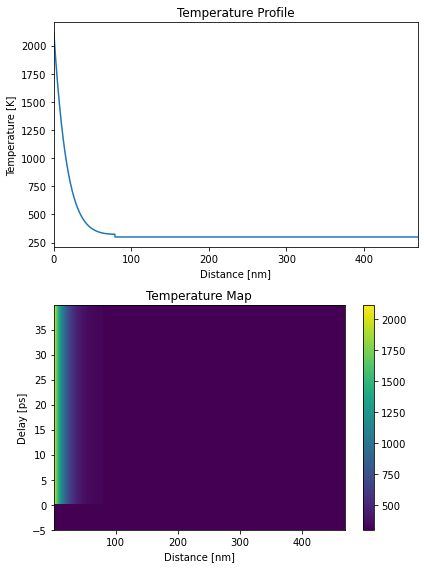

In [7]:
plt.figure(figsize=[6, 8])
plt.subplot(2, 1, 1)
plt.plot(distances.to('nm').magnitude, temp_map[101, :])
plt.xlim([0, distances.to('nm').magnitude[-1]])
plt.xlabel('Distance [nm]')
plt.ylabel('Temperature [K]')
plt.title('Temperature Profile')

plt.subplot(2, 1, 2)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude, temp_map)
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Temperature Map')

plt.tight_layout()
plt.show()

## Numerical Phonons

Refer to the [phonons-example](phonons.ipynb) for more details.

In [8]:
p = ud.PhononNum(S, True)
p.save_data = False
p.disp_messages = True

In [9]:
strain_map = p.get_strain_map(delays, temp_map, delta_temp_map)

Calculating linear thermal expansion ...
Calculating coherent dynamics with ODE solver ...


0it [00:00, ?it/s]

Elapsed time for _strain_map_: 0.673121 s


<ipython-input-10-6ea658ab9bd6>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude,


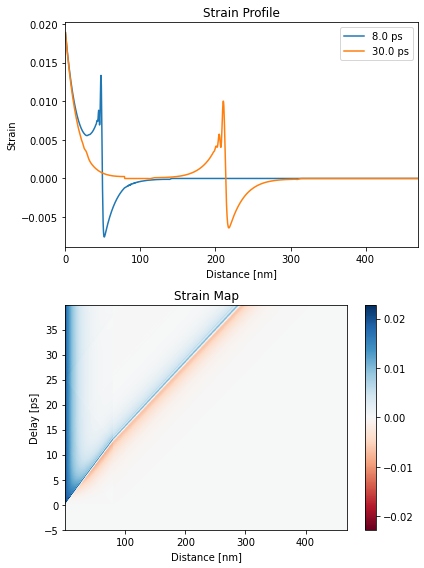

In [10]:
plt.figure(figsize=[6, 8])
plt.subplot(2, 1, 1)
plt.plot(distances.to('nm').magnitude, strain_map[130, :],
         label=np.round(delays[130]))
plt.plot(distances.to('nm').magnitude, strain_map[350, :],
         label=np.round(delays[350]))
plt.xlim([0, distances.to('nm').magnitude[-1]])
plt.xlabel('Distance [nm]')
plt.ylabel('Strain')
plt.legend()
plt.title('Strain Profile')

plt.subplot(2, 1, 2)
plt.pcolormesh(distances.to('nm').magnitude, delays.to('ps').magnitude,
               strain_map, cmap='RdBu',
               vmin=-np.max(strain_map), vmax=np.max(strain_map))
plt.colorbar()
plt.xlabel('Distance [nm]')
plt.ylabel('Delay [ps]')
plt.title('Strain Map')

plt.tight_layout()
plt.show()

## Initialize dynamical X-ray simulation

The `XrayDyn` class requires a `Structure` object and a boolean `force_recalc` in order overwrite previous simulation results.

These results are saved in the `cache_dir` when `save_data` is enabled.
Printing simulation messages can be en-/disabled using `disp_messages` and progress bars can using the boolean switch `progress_bar`.

In [11]:
dyn = ud.XrayDyn(S, True)
dyn.disp_messages = True
dyn.save_data = False

incoming polarizations set to: sigma
analyzer polarizations set to: unpolarized


## Homogeneous X-ray scattering

For the case of homogeneously strained samples, the dynamical X-ray scattering simulations can be greatly simplified, which saves a lot of computational time.

### $q_z$-scan

The `XrayDyn` object requires an `energy` and scattering vector `qz` to run the simulations.  
Both parameters can be arrays and the resulting reflectivity has a first dimension for the photon energy and the a second for the scattering vector.

In [12]:
dyn.energy = np.r_[5000, 8047]*u.eV  # set two photon energies
dyn.qz = np.r_[3.1:3.3:0.00001]/u.angstrom  # qz range

R_hom, A = dyn.homogeneous_reflectivity()  # this is the actual calculation

Calculating _homogenous_reflectivity_ ...
Elapsed time for _homogenous_reflectivity_: 3.196212 s


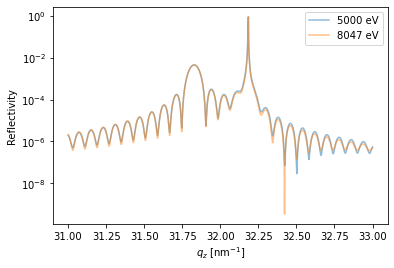

In [13]:
plt.figure()
plt.semilogy(dyn.qz[0, :], R_hom[0, :], label='{}'.format(dyn.energy[0]), alpha=0.5)
plt.semilogy(dyn.qz[1, :], R_hom[1, :], label='{}'.format(dyn.energy[1]), alpha=0.5)
plt.ylabel('Reflectivity')
plt.xlabel('$q_z$ [nm$^{-1}$]')
plt.legend()
plt.show()

Due to the very thick static `substrate` in the `structure` and the very small step width in `qz` also the Darwin width of the substrate Bragg peak is nicely resolvable. 

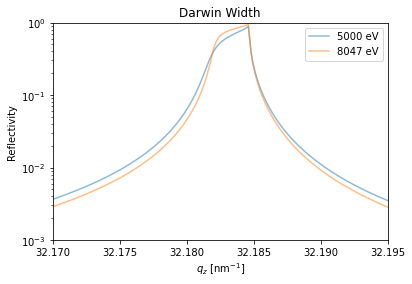

In [14]:
plt.figure()
plt.semilogy(dyn.qz[0, :], R_hom[0, :], label='{}'.format(dyn.energy[0]), alpha=0.5)
plt.semilogy(dyn.qz[1, :], R_hom[1, :], label='{}'.format(dyn.energy[1]), alpha=0.5)
plt.ylabel('Reflectivity')
plt.xlabel('$q_z$ [nm$^{-1}$]')
plt.xlim(32.17, 32.195)
plt.ylim(1e-3, 1)
plt.legend()
plt.title('Darwin Width')
plt.show()

### Post-Processing

All result can be convoluted with an arbitrary function handle, which e.g. mimics the instrumental resolution.

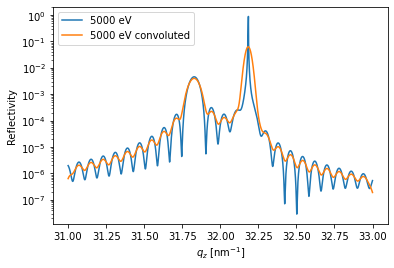

In [15]:
FWHM = 0.004/1e-10  # Angstrom
sigma = FWHM/2.3548

handle = lambda x: np.exp(-((x)/sigma)**2/2)
y_conv = dyn.conv_with_function(R_hom[0,:], dyn._qz[0,:], handle)

plt.figure()
plt.semilogy(dyn.qz[0,:], R_hom[0,:], label='{}'.format(dyn.energy[0]))
plt.semilogy(dyn.qz[0,:], y_conv, label='{} convoluted'.format(dyn.energy[0]))
plt.ylabel('Reflectivity')
plt.xlabel('$q_z$ [nm$^{-1}$]')
plt.legend()
plt.show()

### Energy-scan

Energy scans rely on experimental atomic scattering factors that are include also energy ranges around relevant resonances.

c:\users\loc_schick\general\git\udkm1dsim\udkm1Dsim\simulations\xrays.py:239: RuntimeWarning: invalid value encountered in arcsin
  self._theta = np.arcsin(np.outer(self._wl, self._qz[0, :])/np.pi/4)


Calculating _homogenous_reflectivity_ ...
Elapsed time for _homogenous_reflectivity_: 1.157852 s


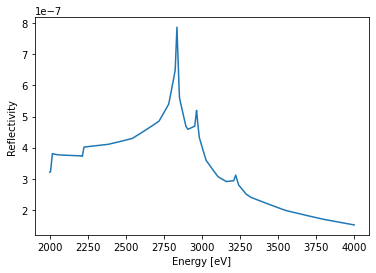

In [16]:
dyn.energy = np.r_[2000:4000]*u.eV  # set the energy range
dyn.qz = np.r_[1]/u.angstrom  # qz range

R_hom, A = dyn.homogeneous_reflectivity()  # this is the actual calculation

plt.figure()
plt.plot(dyn.energy, R_hom[:, 0])
plt.ylabel('Reflectivity')
plt.xlabel('Energy [eV]')
plt.show()

## Inhomogeneous X-ray scattering

The `inhomogeneous_reflectivity()` method allows to calculate the transient X-ray reflectivity according to a `strain_map`.

The actual strains per layer will be discretized and limited in order to save computational time using the `strain_vectors`.

In [17]:
dyn.energy = np.r_[8047]*u.eV  # set two photon energies
dyn.qz = np.r_[3.1:3.3:0.001]/u.angstrom  # qz range

strain_vectors = p.get_reduced_strains_per_unique_layer(strain_map)
R_seq = dyn.inhomogeneous_reflectivity(strain_map, strain_vectors, calc_type='sequential')

Calculating _inhomogeneousReflectivity_ ...
Calculate all _ref_trans_matrices_ ...
Elapsed time for _ref_trans_matrices_: 1.443439 s


Progress:   0%|          | 0/450 [00:00<?, ?it/s]

Elapsed time for _inhomogeneous_reflectivity_: 31.565842 s


<ipython-input-18-4207615591c3>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(dyn.qz[0, :].to('1/nm').magnitude, delays.to('ps').magnitude, np.log10(R_seq[:, 0, :]))


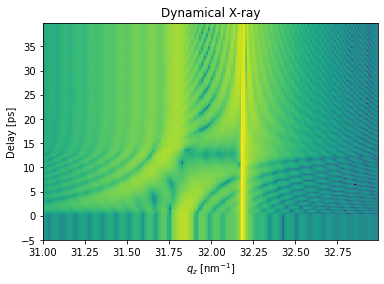

In [18]:
plt.figure()
plt.pcolormesh(dyn.qz[0, :].to('1/nm').magnitude, delays.to('ps').magnitude, np.log10(R_seq[:, 0, :]))
plt.title('Dynamical X-ray')
plt.ylabel('Delay [ps]')
plt.xlabel('$q_z$ [nm$^{-1}$]')
plt.show()

The results can be convoluted again to mimic real experimental resolution:

In [19]:
R_seq_conv = np.zeros_like(R_seq)
for i, delay in enumerate(delays):
    R_seq_conv[i, 0, :] = dyn.conv_with_function(R_seq[i, 0, :], dyn._qz[0, :], handle)

<ipython-input-20-34dd0956789c>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(dyn.qz[0, :].to('1/nm').magnitude, delays.to('ps').magnitude, np.log10(R_seq_conv[:, 0, :]))


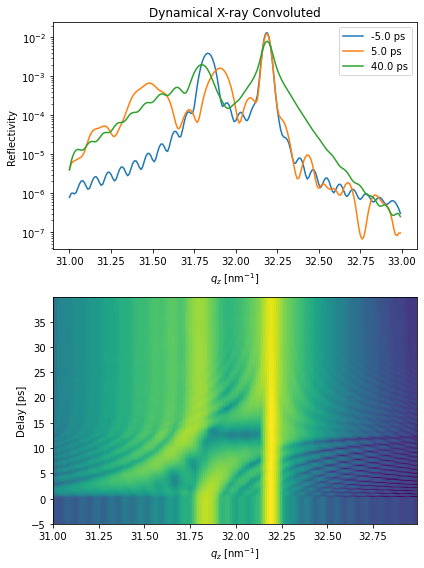

In [20]:
plt.figure(figsize=[6, 8])
plt.subplot(2, 1, 1)
plt.semilogy(dyn.qz[0, :].to('1/nm'), R_seq_conv[0, 0, :], label=np.round(delays[0]))
plt.semilogy(dyn.qz[0, :].to('1/nm'), R_seq_conv[100, 0, :], label=np.round(delays[100]))
plt.semilogy(dyn.qz[0, :].to('1/nm'), R_seq_conv[-1, 0, :], label=np.round(delays[-1]))

plt.xlabel('$q_z$ [nm$^{-1}$]')
plt.ylabel('Reflectivity')
plt.legend()
plt.title('Dynamical X-ray Convoluted')

plt.subplot(2, 1, 2)
plt.pcolormesh(dyn.qz[0, :].to('1/nm').magnitude, delays.to('ps').magnitude, np.log10(R_seq_conv[:, 0, :]))
plt.ylabel('Delay [ps]')
plt.xlabel('$q_z$ [nm$^{-1}$]')

plt.tight_layout()
plt.show()

## Parallel inhomogeneous X-ray scattering

You need to install the `udkm1Dsim` with the `parallel` option which essentially add the Dask package to the requirements:

```
> pip install udkm1Dsim[parallel]
```

You can also install/add Dask manually, e.g. via pip:

```
> pip install dask
```

Please refer to the [Dask documentation](https://docs.dask.org/en/latest/) for more details on parallel computing in Python.


In [21]:
try:
    from dask.distributed import Client
    client = Client()
    R_par = dyn.inhomogeneous_reflectivity(strain_map, strain_vectors, calc_type='parallel', dask_client=client)
    client.close()
except:
    pass

Calculating _inhomogeneousReflectivity_ ...
Calculate all _ref_trans_matrices_ ...
Elapsed time for _ref_trans_matrices_: 1.804284 s
Elapsed time for _inhomogeneous_reflectivity_: 16.934006 s


<ipython-input-22-4e4ae9a47046>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(dyn.qz[0, :].to('1/nm').magnitude, delays.to('ps').magnitude, np.log10(R_par[:, 0, :]))


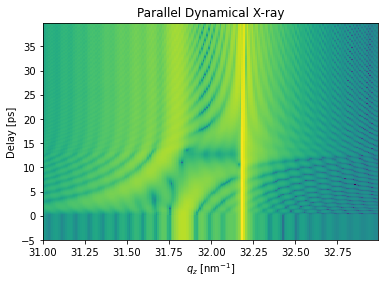

In [22]:
plt.figure()
plt.pcolormesh(dyn.qz[0, :].to('1/nm').magnitude, delays.to('ps').magnitude, np.log10(R_par[:, 0, :]))
plt.title('Parallel Dynamical X-ray')
plt.ylabel('Delay [ps]')
plt.xlabel('$q_z$ [nm$^{-1}$]')
plt.show()